<a href="https://colab.research.google.com/github/Usama-ali336/Deep-learning/blob/main/ClassifierCatDogImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential, Model
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image  # Import the Image class from the PIL library

In [4]:
from google.colab import files
uploaded = files.upload()

!chmod 600 /content/kaggle.json

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# Set correct permissions for the Kaggle API token
#!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats -p /content/dogs-vs-cats-dataset

100% 812M/812M [00:07<00:00, 229MB/s]
100% 812M/812M [00:07<00:00, 116MB/s]


In [7]:
# checking how can the directory be created
#!mkdir -p ~/content/new/dogs-vs-cats-dataset
# !unzip "/content/dogs-vs-cats-dataset/*.zip" -d /content/new/dogs-vs-cats-dataset

In [8]:
!unzip "/content/dogs-vs-cats-dataset/*.zip" -d /content/dogs-vs-cats-dataset


Archive:  /content/dogs-vs-cats-dataset/dogs-vs-cats.zip
  inflating: /content/dogs-vs-cats-dataset/sampleSubmission.csv  
  inflating: /content/dogs-vs-cats-dataset/test1.zip  
  inflating: /content/dogs-vs-cats-dataset/train.zip  


In [9]:
!unzip -q "/content/dogs-vs-cats-dataset/train.zip" -d /content/dogs-vs-cats-dataset/train


In [10]:
!unzip -q "/content/dogs-vs-cats-dataset/test1.zip" -d /content/dogs-vs-cats-dataset/test1

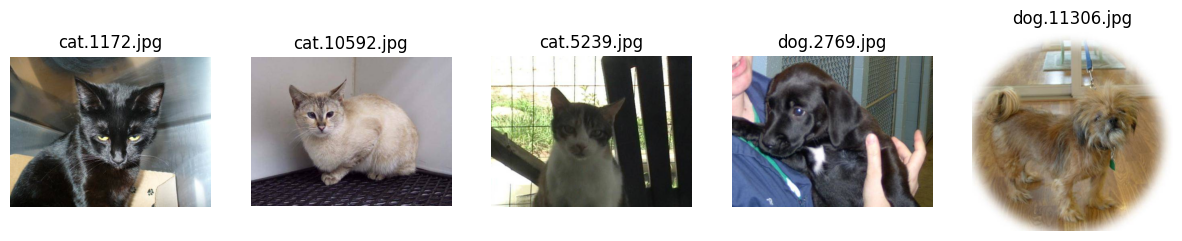

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the extracted training images
train_dir = '/content/dogs-vs-cats-dataset/train/train'

# List some image files
image_files = os.listdir(train_dir)[:5]  # Change the number to display more images

# Display the images
plt.figure(figsize=(15, 8))
for i, image_file in enumerate(image_files, 1):
    img_path = os.path.join(train_dir, image_file)
    img = Image.open(img_path)

    plt.subplot(1, len(image_files), i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)

plt.show()


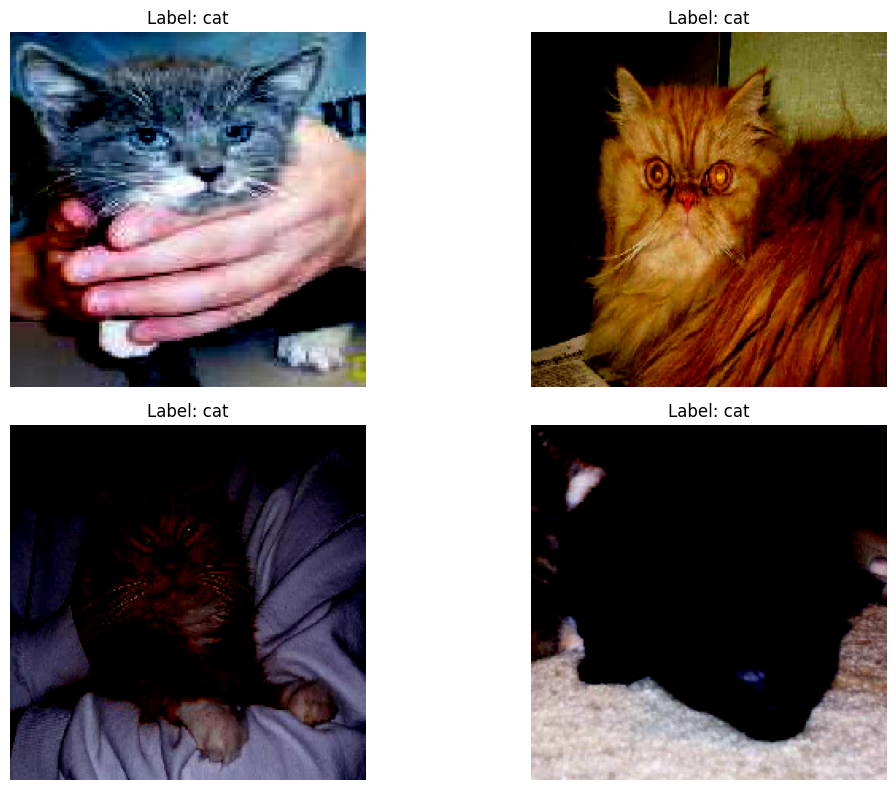

In [12]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Path to the directory containing the images
image_directory = '/content/dogs-vs-cats-dataset/train/train'

# List all files in the directory
all_files = os.listdir(image_directory)

# Filter image files (assuming they are all .jpg)
image_files = [f for f in all_files if f.lower().endswith('.jpg')]

# Select a random subset of images
num_images_to_display = 4
selected_images = random.sample(image_files, num_images_to_display)

# Load and preprocess images
loaded_images = []
labels = []

for image_filename in selected_images:
    image_path = os.path.join(image_directory, image_filename)
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    preprocessed_img = preprocess_input(img_array)
    loaded_images.append(preprocessed_img)

    # Assuming the label is based on the filename (dog or cat)
    label = image_filename.split('.')[0]
    labels.append(label)

# Convert the list of preprocessed images to a NumPy array
loaded_images_array = np.array(loaded_images)

# Visualize the images along with labels
plt.figure(figsize=(12, 8))

for i in range(num_images_to_display):
    plt.subplot(2, 2, i + 1)
    plt.imshow(loaded_images_array[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [13]:
!mkdir -p ~/content/dogs-vs-cats-dataset/train/train/dog/
!mkdir -p ~/content/dogs-vs-cats-dataset/train/train/cat/

!cp /content/dogs-vs-cats-dataset/train/train/dog*.jpg ~/content/dogs-vs-cats-dataset/train/train/dog/

!cp /content/dogs-vs-cats-dataset/train/train/cat*.jpg ~/content/dogs-vs-cats-dataset/train/train/cat/


#!mkdir -p ~/.kaggle
#!cp /content/kaggle.json ~/.kaggle/

In [ ]:
#!mkdir -p ~/content/checking1
#!cp /content/kaggle.json ~/.kaggle/

In [ ]:
#train_directory = '/content/dogs-vs-cats-dataset/train/train'


In [ ]:
#!ls -l /content/dogs-vs-cats-dataset/train/train


In [14]:
import os
import cv2
import numpy as np

# Set the path to your extracted image directory
image_directory = '/content/dogs-vs-cats-dataset/train'

# Initialize empty lists for images and labels
train_images = []
train_labels = []

# Iterate through image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith('.jpg'):
        # Load and preprocess the image
        img = cv2.imread(os.path.join(image_directory, filename))
        img = cv2.resize(img, (desired_width, desired_height))  # Resize to desired dimensions
        img = img / 255.0  # Normalize pixel values

        # Append image to train_images list
        train_images.append(img)

        # Extract label from file name and assign a numeric value
        if 'dog' in filename:
            label = 0
        elif 'cat' in filename:
            label = 1
        else:
            label = -1  # Error or unknown label

        # Append label to train_labels list
        train_labels.append(label)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Shuffle data (optional)
shuffle_indices = np.random.permutation(len(train_images))
train_images = train_images[shuffle_indices]
train_labels = train_labels[shuffle_indices]


In [ ]:
#!git clone https://github.com/Usama-ali336/Deep-learning


Cloning into 'Deep-learning'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 1), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 321.81 KiB | 10.06 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#changing to desired directory
%cd '/content/drive/MyDrive/Colab Notebooks/ComputerVision'


/content/drive/MyDrive/Colab Notebooks/ComputerVision


In [17]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/ComputerVision/.git/


In [18]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	ClassifierCatDogImages.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
#!git rm --cached ClassifierCatDogImages.ipynb

fatal: pathspec 'Untitled68.ipynb' did not match any files


In [ ]:
#!git config -l

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true


In [34]:
!git config --global user.name "Usama-ali336"
!git config --global user.email "usamaali3360@gmail.com"

In [33]:
!git config --global credential.helper store

In [20]:
!git add ClassifierCatDogImages.ipynb


In [21]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   ClassifierCatDogImages.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ClassifierCatDogImages.ipynb



In [22]:
!git commit -m "Load the data from kaggle, visualize and label the images"

[master (root-commit) 94a3a23] Load the data from kaggle, visualize and label the images
 1 file changed, 1 insertion(+)
 create mode 100644 ClassifierCatDogImages.ipynb


In [38]:
!git branch

* master


In [23]:
#!git remote remove origin

In [39]:
!git remote add origin https://github.com/Usama-ali336/Deep-learning.git
!git push origin master


error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [37]:
!git push -u origin --all

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ClassifierCatDogImages.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
#!git add -u #git add -u will stage all updated/modified files

In [ ]:
#!git config -v

error: unknown switch `v'
usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    --worktree            use per-worktree config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-pattern]
    --get-all             get all values: key [value-pattern]
    --get-regexp          get values for regexp: name-regex [value-pattern]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value-pattern]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-pattern]
    --unset-all           remove all matches: name [value-pattern]
    --rename-section      rename section: old-name n

In [ ]:
!git remote -v

In [ ]:
!ls

ClassifierCatDogImages.ipynb  Deep-learning


In [ ]:
!git log online -5

fatal: ambiguous argument 'online': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
